Public link to DEV set evaluation (completed): https://colab.research.google.com/drive/1q-24YGWYX2zo7N50q69Y8jg5Kcb_0ph4?usp=sharing

Public link to TEST set evaluation (completed): https://colab.research.google.com/drive/1N7F-nc9GVnoC_9dBVdNT02SBiBcMbgy-?usp=sharing

Public link to GEN set evaluation (this run): https://colab.research.google.com/drive/1hLH9hFwPT_3HZUteUTBY4tYvdiZN0O0M?usp=sharing

Evaluating RASP-model-for-ReCOGS ( https://github.com/willy-b/learning-rasp/pull/7 ) on the ReCOGS_pos GEN set, see PR description and repo README.md for what this is about. This is an explicitly programmed solution written in the Restricted Access Sequence Processing (RASP) language which can be compiled to Transformer weights to argue a certain type of solution is possible.



Note we do not expect 100% on the generalization split obj-pp-to-subj-pp split but it should be a high score (~90% Semantic Exact Match expected vs my evaluation of Wu et al 2023's baseline Transformer on same data which obtained
19.7% +/- 6.1% Semantic Exact Match accuracy
(sample +/- std, n=20) with 95% confidence interval for the sample mean with n=20 of 17.0% to
22.4%).

In [ ]:
%cd /content/
!apt install --fix-missing python3.10-venv
!rm -rf learning-rasp
!git clone https://github.com/willy-b/learning-rasp.git
%cd learning-rasp
!git fetch -a
!git checkout recogs-like-grammar-multiple-templates-supported-but-switch-to-word-level-tokens-support-complement-phrases
!git log -v -n 1 | grep commit

/content
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-pip-whl python3-setuptools-whl
The following NEW packages will be installed:
  python3-pip-whl python3-setuptools-whl python3.10-venv
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,680 kB/2,474 kB of archives.
After this operation, 2,885 kB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip-whl all 22.0.2+dfsg-1ubuntu0.4
Err:1 http://security.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip-whl all 22.0.2+dfsg-1ubuntu0.4
  404  Not Found [IP: 91.189.91.81 80]
Selecting previously unselected package python3-setuptools-whl.
(Reading database ... 123641 files and directories currently installed.)
Preparing to unpack .../python3-setuptools-whl_59.6.0-1.2ubuntu0.22.04.2_all.deb ...
Unpacking python3-setuptools-whl (59

Issue with nonessential dependency, proceeding as before.

In [ ]:
!git log -v -n 1 | grep commit

commit ccbc98786594ae581e3a39095bf181a7b24db9dc


Start script and verify we are getting the generalization scores logged properly to a file on the side as this evaluation will exceed what Colab supports for output (comparatively enormous input file with many variations checked) and we will rely on printing from the file at the end.

# Evaluation of ReCOGS_pos generalization splits (except cp and pp recursion which will be evaluated in a separate notebook) (100% semantic exact match, n=18,000 all splits except obj_pp_to_subj_pp 92.2%, n=1000)

Note that the output will exceed the capacity of Google Colab for this run, so we will read it from the output file, recogs_examples_in_rasp_running_scores.log .

Scroll to bottom of next cell!

In [ ]:
!python recogs_examples_in_rasp.py --use_gen_split

Streaming output truncated to the last 5000 lines.
prim_to_inf_arg: 100.00% (95.00% confidence interval: 99.60% to 100.00% (909.0 out of 909)
prim_to_obj_common: 100.00% (95.00% confidence interval: 99.59% to 100.00% (901.0 out of 901)
prim_to_obj_proper: 100.00% (95.00% confidence interval: 99.60% to 100.00% (913.0 out of 913)
prim_to_subj_common: 100.00% (95.00% confidence interval: 99.59% to 100.00% (899.0 out of 899)
prim_to_subj_proper: 100.00% (95.00% confidence interval: 99.59% to 100.00% (904.0 out of 904)
subj_to_obj_common: 100.00% (95.00% confidence interval: 99.59% to 100.00% (892.0 out of 892)
subj_to_obj_proper: 100.00% (95.00% confidence interval: 99.59% to 100.00% (906.0 out of 906)
unacc_to_transitive: 100.00% (95.00% confidence interval: 99.59% to 100.00% (906.0 out of 906)


emma offered liam lina 
 emma ( 0 ) ; liam ( 2 ) ; lina ( 3 ) ; offer ( 1 ) AND agent ( 1 , 0 ) AND recipient ( 1 , 2 ) AND theme ( 1 , 3 ) 
Semantic exact match score on first 17308 of ReCOGS_po

Scroll to bottom of cell above to see results.

Note that the printing of the per-category statistics will have a trailing parenthesis added to the formatting before PR#7 submits, but is a nonblocker for computing the accuracy of above.

The run finished, here is the output from the log of the final score:

In [ ]:
!tail -n 60 /content/learning-rasp/recogs_examples_in_rasp_running_scores.log

only_seen_as_transitive_subj_as_unacc_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
only_seen_as_unacc_subj_as_obj_omitted_transitive_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
only_seen_as_unacc_subj_as_unerg_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
passive_to_active: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
pp_dative_to_do_dative: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_inf_arg: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_obj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_obj_proper: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_subj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_subj_proper: 100.00% (95.00% confidence interval


```
Semantic exact match score on first 19000 of ReCOGS_pos gen:

99.59% or 18922.0 out of 19000 (95% confidence interval: 99.49% to 99.68%)


Semantic Exact Match % by category:
active_to_passive: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
do_dative_to_pp_dative: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
obj_omitted_transitive_to_transitive: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
obj_pp_to_subj_pp: 92.20% (95.00% confidence interval: 90.36% to 93.79% (922.0 out of 1000)
obj_to_subj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
obj_to_subj_proper: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
only_seen_as_transitive_subj_as_unacc_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
only_seen_as_unacc_subj_as_obj_omitted_transitive_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
only_seen_as_unacc_subj_as_unerg_subj: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
passive_to_active: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
pp_dative_to_do_dative: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_inf_arg: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_obj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_obj_proper: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_subj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
prim_to_subj_proper: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
subj_to_obj_common: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
subj_to_obj_proper: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)
unacc_to_transitive: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)

# note (String) Exact Match is NOT used by ReCOGS authors, but should be feasible for ReCOGS_pos so I include it

Exact Match score on first 19000 of ReCOGS gen:

94.73684210526315% or 18000.0 out of 19000 (95% confidence interval: 94.41% to 95.05%)

# this is the metric used by ReCOGS authors
Semantic exact match score on first 19000 of ReCOGS_pos gen:

99.59% or 18922.0 out of 19000 (95% confidence interval: 99.49% to 99.68%)
```

# Evaluation of ReCOGS_pos PP and CP recursion splits (separated out from above)

Above all generalization splits except recursion splits were evaluated (complete). Here I will add links to results for recursion splits (evaluating same code commit).

(same command but with argument for `--do_cp_recursion_gen_split`, then `--do_pp_recursion_gen_split`)

(waiting for results, while running it does not show in Colab due to extreme lag, see screenshot below where I tailed log in terminal on right instead)

## PP recursion split (up to depth 12) (100% semantic exact match and string exact match, n=1000)

This was done in a separate notebook to run it in parallel.

Results came in a while ago for the RASP model prepositional phrase recursion generalization split (100% semantic exact match and exact match), but Google Colab is not displaying them (I see it on the GCE VM it is supposed to be associated with).

Unusually, the Google Colab web interface is hanging indefinitely (see screenshots below) (and actually consumes increasing memory up to hanging just trying to display the output; on Firefox it will actually crash the browser), despite the underlying python script completing fine with log output available on the non-hung underlying Google Cloud computer the Colab web interface is connecting to.

Results (reproduce yourself by running the command with `!python recogs_examples_in_rasp.py --use_gen_split --do_pp_recursion_gen_split`):
```
Semantic Exact Match % by category:
pp_recursion: 100.00% (95.00% confidence interval: 99.63% to 100.00% (1000.0 out of 1000)

Exact Match score on first 1000 of ReCOGS gen:
100.0% or 1000.0 out of 1000 (95% confidence interval: 99.63% to 100.00%)
```

These are examples like:
```
SENTENCE: Claire helped a girl beside the lamp on a bed beside the chair beside the stage beside a tree beside the computer on a bowl in the cart in the glass in a room on a table
LOGICAL FORM: claire ( 0 ) ; girl ( 3 ) ; * lamp ( 6 ) ; bed ( 9 ) ; * chair ( 12 ) ; * stage ( 15 ) ; tree ( 18 ) ; * computer ( 21 ) ; bowl ( 24 ) ; * cart ( 27 ) ; * glass ( 30 ) ; room ( 33 ) ; table ( 36 ) ; help ( 1 ) AND agent ( 1 , 0 ) AND theme ( 1 , 3 ) AND nmod . beside ( 3 , 6 ) AND nmod . on ( 6 , 9 ) AND nmod . beside ( 9 , 12 ) AND nmod . beside ( 12 , 15 ) AND nmod . beside ( 15 , 18 ) AND nmod . beside ( 18 , 21 ) AND nmod . on ( 21 , 24 ) AND nmod . in ( 24 , 27 ) AND nmod . in ( 27 , 30 ) AND nmod . in ( 30 , 33 ) AND nmod . on ( 33 , 36 )

...

SENTENCE: A priest mailed the strawberry on the cake on a cookie in the house in the room beside the cat on the dish on the road on a deck on a ball in the microwave to Madison
LOGICAL FORM: priest ( 1 ) ; * strawberry ( 4 ) ; * cake ( 7 ) ; cookie ( 10 ) ; * house ( 13 ) ; * room ( 16 ) ; * cat ( 19 ) ; * dish ( 22 ) ; * road ( 25 ) ; deck ( 28 ) ; ball ( 31 ) ; * microwave ( 34 ) ; madison ( 36 ) ; mail ( 2 ) AND agent ( 2 , 1 ) AND theme ( 2 , 4 ) AND recipient ( 2 , 36 ) AND nmod . on ( 4 , 7 ) AND nmod . on ( 7 , 10 ) AND nmod . in ( 10 , 13 ) AND nmod . in ( 13 , 16 ) AND nmod . beside ( 16 , 19 ) AND nmod . on ( 19 , 22 ) AND nmod . on ( 22 , 25 ) AND nmod . on ( 25 , 28 ) AND nmod . on ( 28 , 31 ) AND nmod . in ( 31 , 34 )
```

This is for a flat/non-tree model which does not recursively combine "np_det pp np" into "np", up to depth 12 (also simulated in RASP interpreter which for the longer sequences is much slower than an actual Transformer but is for proving capabilities here). The tail recursion is handled by iterating through the prepositional phrases as part of the decoder loop. Not the hardest split, see the earlier ones in this notebook but runs very slowly in the RASP interpreter due to the sequence length (would not be slow for a compiled Transformer but here we are just proving capabilities; recall it is unknown if a Transformer could perform all these generalizations perfectly or not).

## CP recursion split (up to depth 12) (100% semantic exact match AND string exact match, n=1000)

(Note previous generalization splits in this file include complement phrases, this split is specific to recursive complement phrases up to depth 12)

Runs very slowly in the RASP interpreter due to the sequence length (would not be slow for a compiled Transformer but here we are just proving capabilities; recall it is unknown if a Transformer could perform all these generalizations perfectly or not).

This was done in a separate notebook to run it in parallel.

Results

(reproduce yourself with `
!python recogs_examples_in_rasp.py --use_gen_split --do_cp_recursion_gen_split`)

```
Exact Match score on first 1000 of ReCOGS[_pos] gen:

100.0% or 1000.0 out of 1000 (95% confidence interval: 99.63% to 100.00%)

Semantic exact match score on first 1000 of ReCOGS_pos gen:

100.00% or 1000.0 out of 1000 (95% confidence interval: 99.63% to 100.00%)
```
(note it is first 1000 out of 1000; all rows)

(see screenshots below, full results files Google Drive link access available upon request at https://drive.google.com/file/d/1skyQtfLd0SfOHH7oop0e3FQ2jAl8eBtk/view?usp=drive_link )

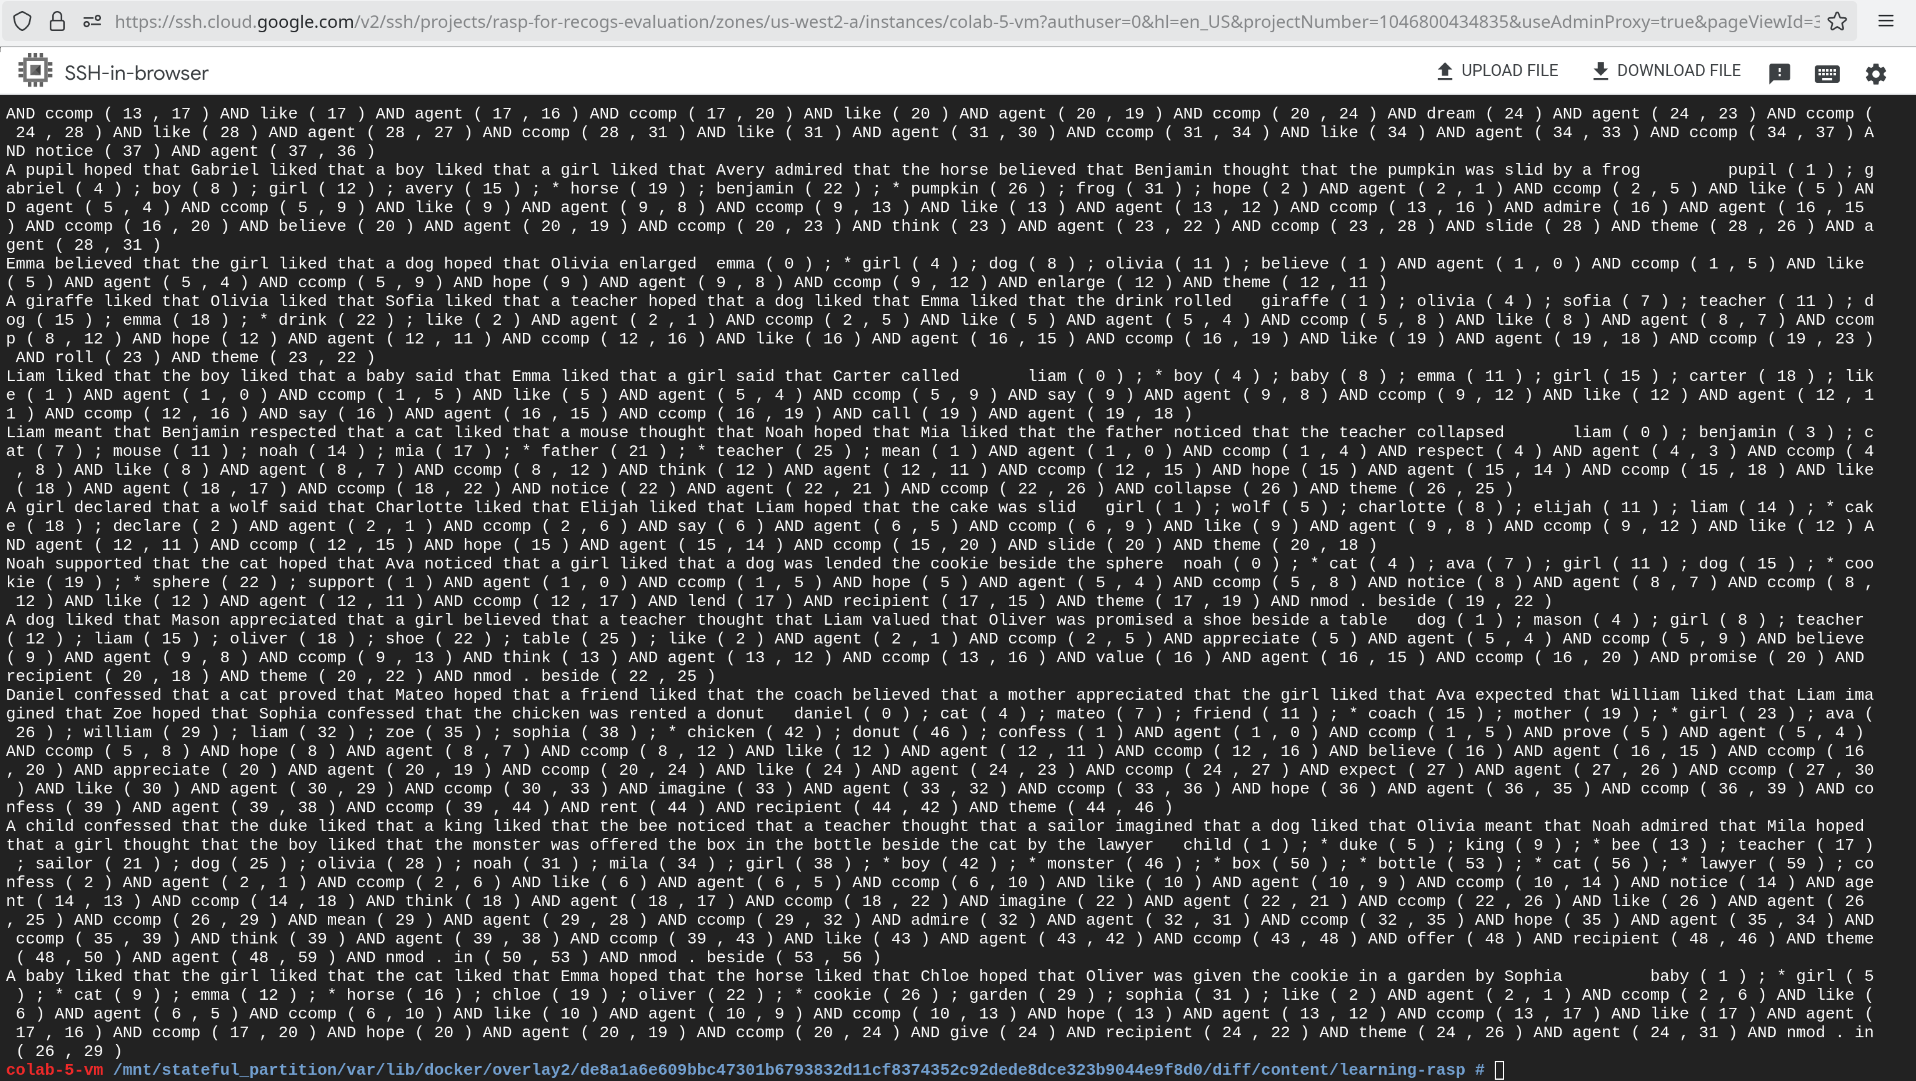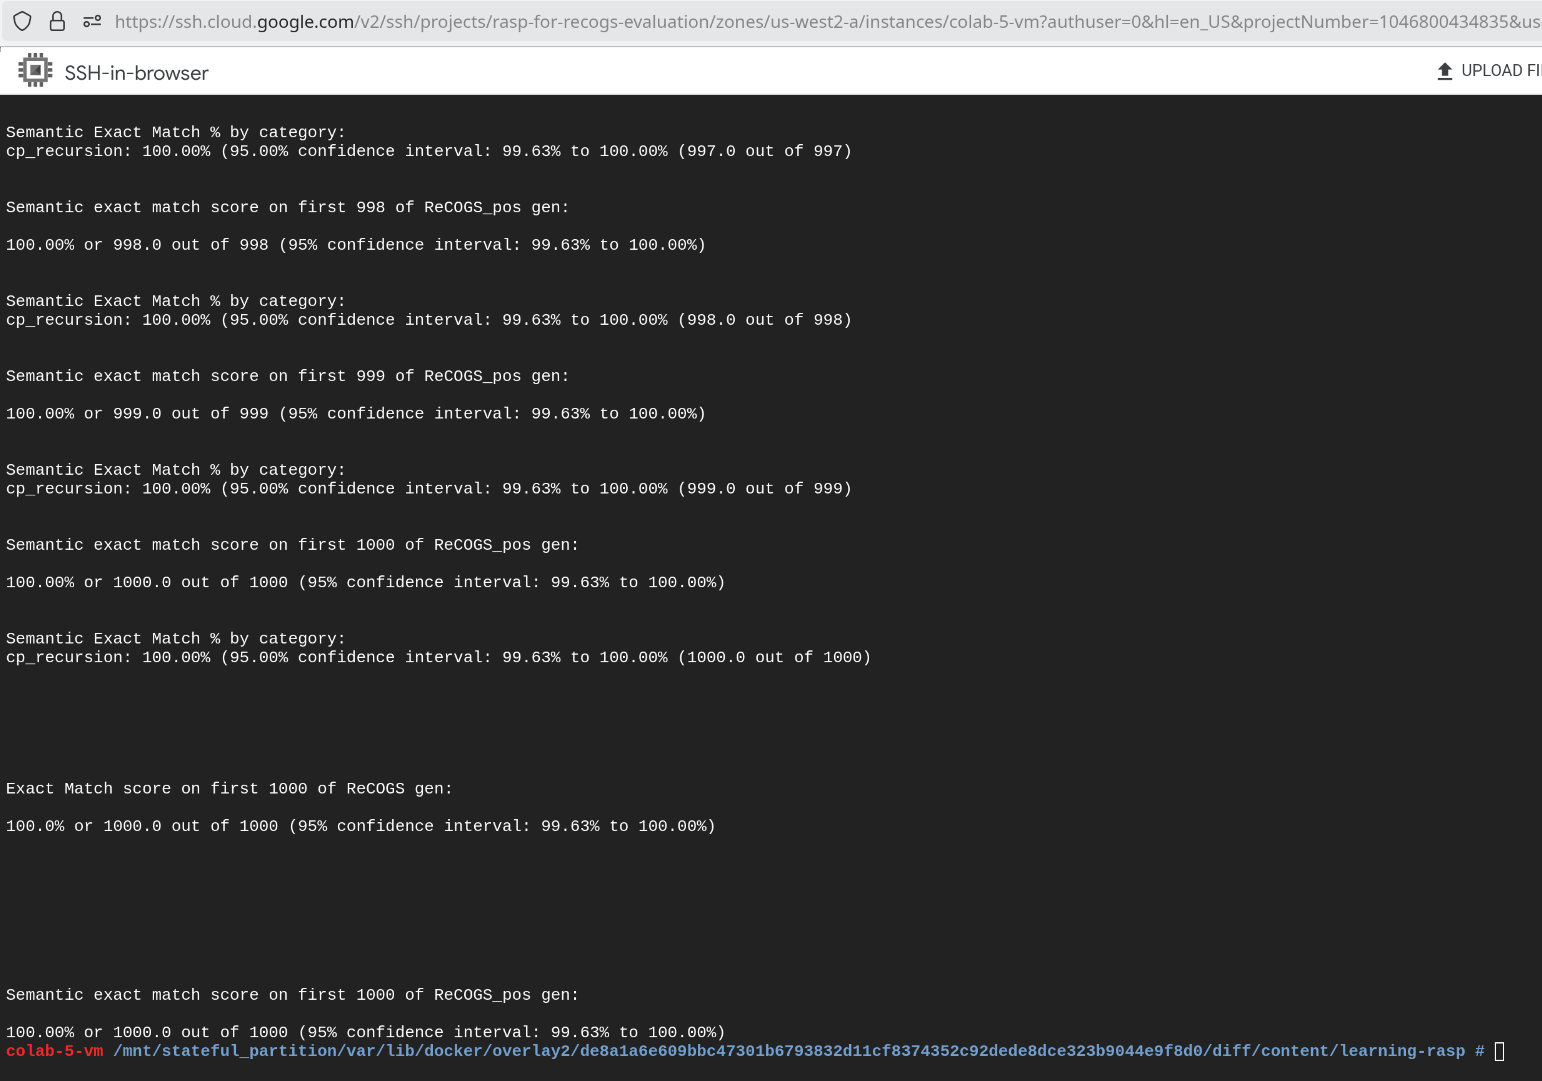